In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display

In [ ]:
# Load the Speech Commands dataset
dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)


In [ ]:
train_data, test_data = dataset['train'], dataset['test']


In [ ]:
train_data.take(1)

In [ ]:
for spectrogram, label in train_data.take(1):
    print("Spectrogram shape:", spectrogram.shape)
    print("Label:", label)


7
tf.Tensor(1.0, shape=(), dtype=float32)


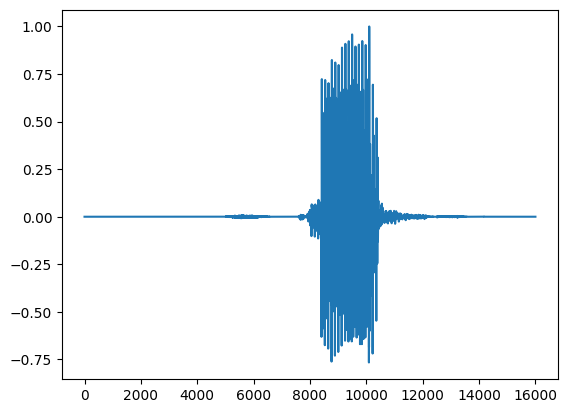

In [97]:
def compute_spectrogram(audio, frame_length=1024, frame_step=512):
    # Compute the STFT (Short-Time Fourier Transform)
    stft = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step, pad_end=False)
    
    # Compute the magnitude of the STFT (abs value)
    spectrogram = tf.abs(stft)
    return spectrogram


def plot_spectrogram(spectrogram):
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram, aspect='auto', cmap='inferno')
    plt.title('Spectrogram')
    plt.xlabel('Time Steps')
    plt.ylabel('Frequency Bins')
    plt.show()

# Plot the first spectrogram from the dataset
iterator = iter(train_data.take(3))
spectrogram, label = next(iterator)
spectrogram, label = next(iterator)
spectrogram, label = next(iterator)

print(label.numpy())
audio = spectrogram / tf.reduce_max(tf.abs(spectrogram))
audio = audio.numpy()
plt.plot(audio)
    
    #spect = compute_spectrogram(spect, frame_length=512, frame_step=256)
    #plot_spectrogram(spect)  # Plot the first example
    


In [98]:
display.Audio(audio, rate=16000)

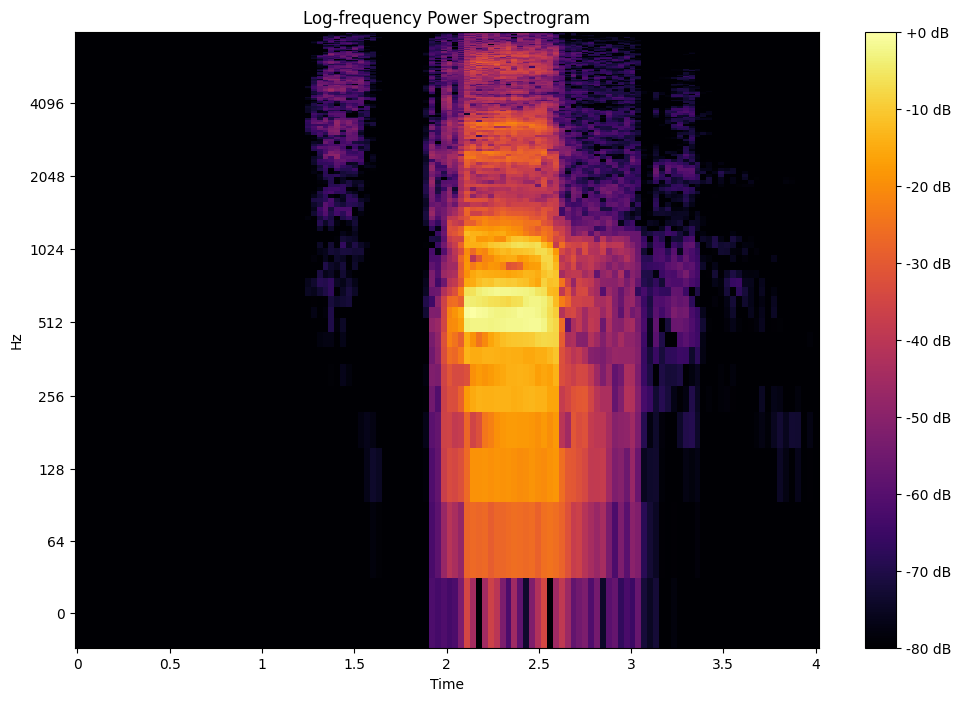

In [106]:
D = librosa.stft(audio, n_fft=256, hop_length=128, window='hann')

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=16000, cmap='inferno')
plt.title('Log-frequency Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()